Ομάδα A18  
Χρήστος Λούρας (03114037)  
Ανδρέας Καλογεράς (03114822)  

# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
Ημερομηνία εκφώνησης άσκησης: 3/12/18
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 



In [ ]:
#!pip install --upgrade pip
#!pip install --upgrade numpy
#!pip install --upgrade pandas
#!pip install --upgrade nltk
#!pip install --upgrade scikit-learn

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [1]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα μπορεί να βρει [εδώ](https://docs.google.com/spreadsheets/d/12AmxMqvjrc0ruNmZYTBNxvnEktbec1DRG64LW7SX4HA/edit?usp=sharing) τον μοναδικό  αριθμό της "Seed" από 1 έως 128. 

2. Το data frame `df_data_2` έχει 128 γραμμές (ομάδες) και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας από το Google Sheet.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [2]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 18
movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="50%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)
# joblib.dump(corpus_tf_idf, "corpus_tf_idf_default")

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing) των ασκήσεων.


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


*Ο κώδικας της συνάρτησης ακολουθεί παρακάτω.*

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

## Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
from sklearn.externals import joblib  
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα. Προσοχή: αυτό ισχύει μόνο στα Azure και Kaggle, στο Colab και στο IBM τα αρχεία εξαφανίζονται όταν ανακυκλώνεται ο πυρήνας και θα πρέπει να τα αποθηκεύετε τοπικά. Περισσότερα στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing).

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [ ]:
from sklearn.externals import joblib
#joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl')



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [ ]:
!ls

και μπορούμε να τα διαβάσουμε με `joblib.load`

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Υλοποίηση Συνάρτησης

Στη συνέχεια θα ασχοληθούμε με τη βελτιστοποίηση της TfidVectorizer.
Το πρώτο πράγμα που πρέπει να κάνουμε είναι να τα κάνουμε **όλα πεζά**. Έπειτα θέλουμε να **χωρίσουμε τις λέξεις μια προς μια**, ώστε να φτιάξουμε μια λίστα τα στοιχεία της οποίας θα είναι οι λέξεις.

In [ ]:
import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
nltk.download('punkt') # χρειάζεται για το tokenizer
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

#Δημιουργούμε την κλάση Lemmatizer την οποία θα δώσουμε ως όρισμα στην συνάρτηση TfidVectorizer στην υπερπαράμετρο "tokenizer".
# Ο κώδικας για το LemmaTokenizer βρέθηκε στο StackOverflow
# Εμείς προσθέσαμε σε αυτόν τον έλεγχο του μήκους και για stopwords του nltk
# Επίσης τον τροποποιήσαμε για να κάνει και Stemming πέρα απο Lemma

class LemmaTokenizer(object):   
    def __init__(self,  minimum_length):
        self.min_length = minimum_length
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles) if (t not in stopwords) and (len(t) >= self.min_length)]
        
class PorterTokenizer(object):   
    def __init__(self,  minimum_length):
        self.min_length = minimum_length
        self.ps = PorterStemmer()
    def __call__(self, articles):
        return [self.ps.stem(t) for t in word_tokenize(articles) if (t not in stopwords) and (len(t) >= self.min_length)]


def preprocess(corp, ngram_r, mi_df, ma_df, min_length, lemm):
    if lemm == "stem":
        vectorizer_new = TfidfVectorizer(ngram_range=ngram_r, token_pattern=r'(?u)\b[A-Za-z]+\b', max_df=ma_df, min_df=mi_df, strip_accents='ascii', tokenizer= PorterTokenizer(min_length))
    elif lemm == "lemma":
        vectorizer_new = TfidfVectorizer(ngram_range=ngram_r, token_pattern=r'(?u)\b[A-Za-z]+\b', max_df=ma_df, min_df=mi_df, strip_accents='ascii', tokenizer= LemmaTokenizer(min_length))
    else:
        vectorizer_new = TfidfVectorizer(ngram_range=ngram_r, max_df=ma_df, min_df=mi_df, strip_accents='ascii')
    new_corpus = vectorizer_new.fit_transform(corp) #εφαρμόζουμε την vectorizer
    # print(new_corpus.shape)
    return new_corpus

Με την παρακάτω εντολή υπολογίστηκε το τελικό corpus_tf_idf:

In [ ]:
corpus_tf_idf = preprocess(corpus, (1,2), 30, 0.2, 2, True)

In [ ]:
print(corpus_tf_idf.shape)
print(corpus_tf_idf)

*Ο παρακάτω κώδικας χρησιμοποιήθηκε για να υπολογίσουμε διάφορα corpus_tf_idf για διαφορετικές τιμές παραμέτρων, ώστε να βρούμε βέλτιστες.*

In [ ]:
ngr_ranges = [(1,1), (1,2)]
min_dfs = [2, 5, 10, 15, 20, 25, 30, 35]
max_dfs = [0.1, 0,2, 0.3, 0.4, 0.5]
stem = ["lemma" "stem", "none"]
min_len = [1, 2, 3]


for n_r in ngr_ranges:
    for min_d in min_dfs:
        for max_d in max_dfs:
            for st in stem:
                if st == "lemma":
                    for m_l in min_len:
                        file_name = "corpus_tf_idf_"+str(n_r)+"_"+str(min_d)+"_"+str(max_d)+"_"+str(m_l)+".pkl"
                        %time corpus_tf_idf = preprocess(corpus, n_r, min_d, max_d, m_l, st)
                        joblib.dump(corpus_tf_idf, file_name)
                        print(n_r, min_d,max_d,m_l, " : ", corpus_tf_idf.shape)
                elif st == "stem":
                    for m_l in min_len:
                        file_name = "corpus_tf_idf_"+str(n_r)+"_"+str(min_d)+"_"+str(max_d)+"_"+str(m_l)+"stem.pkl"
                        %time corpus_tf_idf = preprocess(corpus, n_r, min_d, max_d, m_l, st)
                        joblib.dump(corpus_tf_idf, file_name)
                        print(n_r, min_d,max_d,m_l, " : ", corpus_tf_idf.shape)
                else:
                    file_name = "corpus_tf_idf_"+str(n_r)+"_"+str(min_d)+"_"+str(max_d)+"_"+"no_lem.pkl"
                    %time corpus_tf_idf = preprocess(corpus, n_r, min_d, max_d, 0, st)
                    joblib.dump(corpus_tf_idf, file_name)
                    print(n_r, min_d,max_d, " no_lem : ", corpus_tf_idf.shape)

Στην συνέχεια φορτώνουμε το τελικό corpus_tf_idf που παραδώσαμε μαζί με την αναφορά:

In [3]:
# ngr_ranges = (1,2)
# min_dfs = 30
# max_dfs = 0.2
# min_len = 2
# stem = "stem"
from sklearn.externals import joblib
file_name_corpus = "corpus_tf_idf.pkl"
corpus_tf_idf = joblib.load(file_name_corpus)
print(corpus_tf_idf.shape)

(5000, 3315)


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

def content_recommender(target_movie,  max_recommendations):
    # αρχικοποίηση στο μηδέν
    cos_values=np.zeros(5000)
    print("Target movie", target_movie)                     # το id της ταινίας στόχου
    print("Title:", titles[target_movie][0])                # ο τίτλος της ταινίας
    print("Summary:", corpus[target_movie])                 # Η περιγραφή της
    print("Genres:", categories[target_movie][0])           # οι κατηγορίες στις οποίες ανήκει

    # συγκρίνουμε την ταινία στόχο με όλες τις υπόλοιπες με την ομοιότητα συνημιτόνου
    for movie in range(0, 5000):
        cos_values[movie] = cosine_similarity(corpus_tf_idf[target_movie], corpus_tf_idf[movie])

    cos_val_desc = (-cos_values).argsort()[:5000]             #τις διατάσσουμε σε φθίνουσα σειρά
    cos_val_max = cos_val_desc[1:max_recommendations + 1]       #αφαιρούμε την πρώτη που είναι ο ευατός της
    # Print best recomendations
    print()
    print(max_recommendations, "most related movies based on personal preference:\n")
    for recommendations in range(1, max_recommendations+1):  # για όσα recommendations ζητήθηκαν
        print("*** Recommendation No %d ***" % (recommendations))
        print(cos_values[cos_val_max[recommendations-1]])  # εκτυπώνουμε ομοιότητα συνημιτόνου και ποιο recommendation είναι
        print("Movie ID: ", cos_val_max[recommendations-1]) # το id της
        print("Title:", titles[cos_val_max[recommendations-1]][0])      # τον τίτλο της
        print("Summary:", corpus[cos_val_max[recommendations-1]])       # την περιγραφή της
        print("Genres:", categories[cos_val_max[recommendations-1]][0]) # τις κατηγορίες στις οποίες ανήκει
    return

#  Επεξήγηση επιλογών και ποιοτική ερμηνεία

Οι παράμετροι τις οποίες χρησιμοποιήσαμε προκειμένου να βελτιστοποιηθεί η TdifVectorizer είναι οι εξής:

**ngram_range:** Με αυτή την παράμετρο ορίζουμε τα εύρη των λέξεων τα οποία μπορούν να θεωρηθούν αυτούσια ως tokens. Εμείς επιλέξαμε διαστήματα (1,1) (δηλαδή μόνο μονογράμματα) και (1,2) (token δύο λέξεων). Ο λόγος που προχωρήσαμε σε αυτή την επιλογή είναι διότι στην αγγλική γλώσσα υπάρχουν πολλά παραδείγματα που ο συνδυασμός δύο λέξεων έχει άλλη σημασιολογική ερμηνεία συγκριτικά με τις λέξεις αυτές αυτούσιες. Χαρακτηριστικό παράδειγμα είναι τα phrasal verbs, όπως π.χ. το "take off". Το token "take off" έχει άλλη σημασιολογική ερμηνέια σαν οντότητα σε σχέση με το διαδοχικό διάβασμα των tokens "take" και "off".

**max_df:** Αυτή η παράμετρος προσδιορίζει το μέγιστο ποσοστό(ή πλήθος corpus) συχνότητας εμφάνισης μίας λέξης στο οποίο απο κεί και πέρα αγνοείται αυτή η λέξη. Χρησιμοποιείται κυρίως για λέξεις όπως "movie,plot". Εμείς ξεκινήσαμε απο ποσοστό(στη δεδομένη παράμετρο για λόγους ευελιξίας επιλέξαμε να την εκφράσουμε με ποσοστό) 0.8 και το μειώσαμε μέχρι το 0.2. Παρατηρήσαμε πως δεν υπάρχει "κορεσμός" του ΤdifVectorizer καθώς τα αποτελέσματα που βγάζαμε ήταν ικανοποιητικά, και το μέγεθος του corpus δεν μειώθηκε τόσο σημαντικά. Δηλαδή αυτή η μεταβλητή δεν επηρεάζει τόσο όσο θα περιμέναμε βάσει ορισμού, το μέγεθος του βελτιστοποιημένου corpus.

**min_df:** Αυτή η παράμετρος προσδιορίζει το ελάχιστο ποσοστό(ή πλήθος corups) συχνότητας εμφάνισης μίας λέξης στο οποίο απο κεί και κάτω αγνοείται αυτή η λέξη. Αυτο το κάνουμε για να αποφύγουμε τυχόν "σπάνια" ονόματα (π.χ. Arnold) τα οποία μπορεί να είναι σε 2 περιγραφές ταινιών οι οποίες είναι εντελώς άσχετες μεταξύ τους. Μετά απο δοκιμές επιλέξαμε να ρυθμίσουμε την παράμετρο αυτή στο 30(30 corpus τουλάχιστον δηλαδή), και παρατηρήσαμε πως μειώνει σημαντικά το μέγεθος του corpus, με τα επιθυμητά αποτελέσματα στα recommendations(μάλιστα, αν συνεχίσουμε να αυξάνουμε το min_df, θα μειωθεί υπερβολικά πολύ το μέγεθος του corpus και πλέον θα αρχίσουμε να χάνουμε πληροφορία).

**strip_accents='ascii':** Αυτή η παράμετρος ορίζει ότι θα λαμβάνονται υπόψη μόνο οι χαρακτήρες σε μορφη ASCII.

**tokenizer:** Εδώ αρχικά χρησιμοποιήσαμε τη λημματοποίηση και μετα το stemming. Συγκρίνοντας τους 2 tokenizers, διαπιστώσαμε πως το stemming (με σταθερές τις υπόλοιπες παραμέτρους) παράγει ελαφρώς μικρότερο shape και εμφανίζει λίγο καλύτερα αποτελέσματα στα recommendations. Επομένως, προτιμήσαμε το stemming.

 ## 10 παραδείγματα ταινιών με πολύ ικανοποιητικές εξόδους (Για max_recommendations = 7)

Ακολουθεί αρχικά ο κώδικας για τα 10 παραδείγματα, και μετά αναφερόμαστε σε ένα markdown σε όλα τα παραδείγματα.

In [5]:
content_recommender(777,7)

Target movie 777
Title: Shri Datta Darshanam
Summary: Atri and Anasuya do a very long penance to get divine blessings. As a result, divine trinity Brahma, Vishnu and Shiva incarnate as their son Dattatreya. He grows up and becomes a great Yogi. Indra prays him for help, when is dethroned by Jambhasura. Datta kills Jambhasura with his yogic powers. Vishnudatta, a brahmin scholar is tested by Datta and given the greatest Upadesham. Kartaveerya is born with defects. He worships Datta and as a result he is bestowed with great powers. Later Parashurama controls Kaartaveerya's pride. Jamadagni, father of Parashurama is killed by Kartaveerya's sons in retaliation. Then, Parashurama kills all kings who do not follow Dharma  and then repents for his sinful acts. Datta gives him divine knowledge.
Genres: "Musical",  "Drama"

7 most related movies based on personal preference:

*** Recommendation No 1 ***
0.18906447576902513
Movie ID:  3696
Title: The Lion King
Summary: In the Pride Lands of Afri

In [6]:
content_recommender(2222,7)

Target movie 2222
Title: Young Pioneers' Christmas
Summary: A young couple, Molly and David Beaton, and their neighbours celebrate Christmas in 1874 on the Dakota prairie. Despite tragedy and an ongoing battle with the Railway company, Christmas is a homespun and overly sentimental affair.
Genres: "Western",  "Drama"

7 most related movies based on personal preference:

*** Recommendation No 1 ***
0.4118498332784126
Movie ID:  3322
Title: Shrek the Halls
Summary: The special is set shortly after the events of Shrek the Third , as Shrek and Fiona's children are still infants. Shrek  is quietly living in the swamp with his family when the Christmas season arrives. Under Donkey's  urging, Shrek reluctantly promises Princess Fiona  a special Christmas surprise. Shrek goes to the local bookstore in Far, Far Away to try to find a present for Fiona, but since he does not know what Christmas is all about, the shopkeeper  gives Shrek a copy of Christmas For Village Idiots, a step-by-step guide 

In [7]:
content_recommender(333,7)

Target movie 333
Title: Quai des Orfèvres
Summary: Jenny Lamour  wants to succeed in the theatre. Her husband and accompanist is Maurice Martineau , a mild-mannered but jealous man. When he finds out that Jenny has been making eyes at Brignon, a lecherous old businessman, in order to further her career, he loses his temper and threatens Brignon with death. Despite this, Jenny goes to a secret rendezvous at Brignon's apartment, who is murdered the same evening. The criminal investigations are led by Inspector Antoine .
Genres: "Crime Fiction",  "Marriage Drama",  "Drama",  "World cinema",  "Crime Drama"

7 most related movies based on personal preference:

*** Recommendation No 1 ***
0.6164638024329409
Movie ID:  750
Title: Out of Step
Summary:  The film begins with a narration by Jenny Thomas  over scenes of a blonde girl dancing as she grows up. She explains that the two most important things in her life are her dancing and her faith . Her mother  was always pushing her to do well whi

In [8]:
content_recommender(987,7)

Target movie 987
Title: I Love to Singa
Summary: I Love to Singa depicts the story of a young owlet who wants to sing jazz, instead of the classical music that his German parents wish him to perform. The plot is a light-hearted tribute to Al Jolson's film The Jazz Singer. The young owl, voiced by Tommy Bond, best known as "Butch" of the Our Gang films, is unjustly kicked out of his family's house by his disciplinarian violinist father  after he is caught singing jazz instead of "Drink to Me Only with Thine Eyes" to the reed  organ accompaniment of his mother . While wandering, he comes across a radio amateur contest, hosted by "Jack Bunny" , and billing himself as "Owl Jolson" , wins the contest, but not before his father has finally seen his son's potential and allows him to freely sing jazz.
Genres: "Short Film",  "Musical",  "Comedy",  "Animation"

7 most related movies based on personal preference:

*** Recommendation No 1 ***
0.26888068684818894
Movie ID:  2596
Title: Ma and Pa Ke

In [9]:
content_recommender(1916,7)

Target movie 1916
Title: Scooby-Doo! Curse of the Lake Monster
Summary:  School has just ended. Velma  and Shaggy  are waiting by the van for Fred  and Daphne  so they can go to meet Daphne's Uncle, who has given them summer jobs at his country club in Erie Point so the gang can pay for the damages they did to a barn setting it on fire during one of their mysteries. They then find Fred and Daphne making out in the back of the van. Daphne reveals that they started dating after she fell out of the top of the barn from the mystery that caused them to get the summer jobs and he had caught her, making her realize that he was "the one." Velma warns them that often when two people in a group start dating, any changes of that relationship affects the whole group, but the two don't seem to care. On the way to the country club, Fred gets lost. They stop at a small country store called Trowburg's where a seemingly crazy woman tells them that she warned them not to build the country club, and that


7 most related movies based on personal preference:

*** Recommendation No 1 ***
0.5080013871715436
Movie ID:  1898
Title: The Horror of Party Beach
Summary: The movie starts with Hank and his immature girlfriend, Tina, driving in a car to the beach with a gang of motorcyclists. Tina is drinking alcohol, Hank tells Tina to lay off the alcohol, but Tina says she's going to have a great cocktail. Hank says he's not going to carry her everywhere like a servant. Tina gets mad and says she never needed him. Hank says that he has matured from being a "campus big shot who'd do anything for kicks." She wants to prove to him she can live better in her own way. Meanwhile, a boat dumps toxic waste into the ocean, which lands on a sunken ship with a skull of a dead sailor, which transforms slowly into a half human, half fish-like monster. The monster then proceeds to make its way to the surface. Meanwhile, a party is going on at the beach with music played live by "The Del-Aires". The party catch

In [10]:
content_recommender(4500,7)

Target movie 4500
Title: Kyon Ki
Summary: The film tells the story of a young man named Anand , who was deeply in love with a girl named Maya , who was intentionally thrown into a swimming pool by her fiance for the sake of getting back at her pranks. Apparently, she drowned. After Maya's death, Anand's life is completely shattered and he becomes insane. He is brought to Sir Richard's Mental Sanatorium. His brother requests the doctors to admit him immediately. However, they insist on evaluating his mental condition before taking any decision. On being asked a few questions, Anand does not show any signs of insanity, and the doctors conclude that there is nothing wrong with him. They decline to admit him to the hospital. Just then, Anand spots a housefly on the table. He first tries to capture it in his palm, but it evades him. While Anand's elder brother is arguing with doctors to admit him, Anand suddenly becomes very violent, picking up a club and using it to hit everything the fly 

In [11]:
content_recommender(881,7)

Target movie 881
Title: Care Bears Nutcracker Suite
Summary: At a school called <abbr title="Public school">P.S.</abbr> 5, a teacher named Miss Walker tells some children a version of E. T. A. Hoffmann's The Nutcracker and the Mouse King, involving the Care Bear Family. As the story begins, the Care Bears and their Cousins prepare for Christmas in their home of Care-a-lot; the two youngest bears, Hugs and Tugs, are searching for an ornament. While the others spend time in the Hall of Hearts decorating a tree, another bear called Funshine suddenly alerts them of an unhappy girl named Anna. Enlisting Grumpy Bear to go along, she takes a Cloud Mobile down to Earth. When the two bears visit Anna, they learn that her past friend Sharon has moved, and her brother Peter is fond of acting as a pirate. As they talk about the virtues of friendship, a burst of light startles them. Eventually, a tall wooden soldier called the Nutcracker emerges from a black portal, along with a band of rats  who a

In [12]:
content_recommender(3675,7)

Target movie 3675
Title: Batman Forever
Summary:  In Gotham City, Batman  stops a hostage situation in a bank caused by Two-Face , the alter ego of the disfigured former district attorney, Harvey Dent. Unfortunately, Two-Face escapes. Edward Nygma , a researcher at Wayne Enterprises, develops a device to beam television directly to a person's brain; Bruce Wayne  rejects the invention, noting that it "raises too many questions", and Edward angrily resigns from his position. After meeting psychiatrist Dr. Chase Meridian , Bruce invites her to a charity circus event. There, Two-Face and his henchmen storm the event in an attempt to discover Batman's secret identity, and in the process murder The Flying Graysons, a family of acrobats. The youngest member, Dick , survives and throws Two-Face's bomb into the river. Bruce assumes responsibility for Dick and allows him to stay at Wayne Manor. Dick then declares his intention to kill Two-Face and avenge his family's murder, and when he discover

In [13]:
content_recommender(2178,7)

Target movie 2178
Title: Ram Lakhan
Summary: Sharda  is happily married in an rich aristocratic household to Thakur Pratap Singh  and is the mother to 2 young boys. Thakur Pratap Singh's father shows mercy to his nephews Bhishamber  and Bhanu after they serve jail time for siphoning the family wealth and stealing within the household and whiling away their time - drinking and gambling. Sr. Thakur is tricked into signing a will that deprives his son, wife  and 2 children from the ancestral wealth and the right to even live in the manor's premises. Sr. Thakur is then killed off in a car bomb and when Thakur Pratap Singh refuses to bow down to cruel Bhishamber Nath after finding out their masterplan and after his wife is humiliated publicly by then, he is severely beaten up, stabbed brutally by the, and left on a nearby railway track to be cut to pieces by the next passing train, leaving behind his widowed wife who, Sharda, and two young sons, Ram and Lakhan. Sharda who witnesses the whol

In [14]:
content_recommender(891,7)

Target movie 891
Title: King of the Zombies
Summary: During World War II, a small plane somewhere over the Caribbean runs low on fuel and is blown off course by a storm. Guided by a faint radio signal, they crash-land on an island. The passenger, his manservant and the pilot take refuge in a mansion owned by a doctor. The quick-witted yet easily-frightened manservant  soon becomes convinced the mansion is haunted by zombies, and confirms this with some of the doctor's hired help. Exploring, the three stumble upon a voodoo ritual being conducted in the cellar, where the doctor, who is in reality a foreign spy, is trying to acquire war intelligence from a captured US Admiral whose plane had crashed in a similar fashion on the island. But the interruption causes the zombies to turn on their master.
Genres: "Zombie Film",  "B-movie",  "Horror",  "Black-and-white"

7 most related movies based on personal preference:

*** Recommendation No 1 ***
0.23919804668565817
Movie ID:  2291
Title: Geo

**1.**  *Movie ID:* 777

   *Title:* Shri Data Darsharam
   
   *Recommendations:* The Lion King, Ready To Rumble, Night Pastor, The Mask Of Diijon, Rosita, A Price Above Rubies, Satyawardi Raja Harischandra
   
   Το κοινό χαρακτηριστικό αυτών των ταινιών είναι ότι όλα περιέχουν ίντριγκα και φόνο. Παρατηρούμε επίσης ότι σε όλες τις περιγραφές ταινιών υπάρχουν οι λέξεις "king" και "kill".
        
**2.**  *Movie ID:* 2222

*Title:* Young Pioneers' Christmas

*Recommendations:* Shrek The Halls, An All Dogs Christmas Carol, Merry Christmas, Drake & Josh, One Magic Christmas, The Expendables, The Man Who Saved Christmas, Shine

Το κοινό χαρακτηριστικό όλων αυτών των ταινιών είναι ότι είναι χριστουγεννίατικες, και περιπέτειας.

**3.** *Movie ID:* 333

*Title:* Quai des Orfevres

*Recommendations:* Out Of Step, Undercover Angel, The Screaming Skull, Ajab Prem Ki Ghazab Kahani, Wicked Stepmother, The Killer, Milan

Το κοινό χαρακτηριστικό αυτών των ταινιών είναι το ρομαντικό ύφος, το δράμα, και τα στοιχεία θρίλερ.

**4.** *Movie ID:* 987

*Title:*  I Love To Singa

*Recommendations:* Ma and Pa Kettle At Home, The Pinch Singer, The Beauty Prize, Yash, Funny Bones, Worlds and Music, Morning Raga

Το κοινό χαρακτηριστικό αυτών των ταινιών είναι το καλλιτεχνικό τους ύφος(περιέχουν μουσική, τραγουδιστές και διαγωνισμούς)

**5.** *Movie ID:* 1916

*Title:* Scooby Doo! Curse Of The Lake Monster

*Recommendations:* The Horror Of Party Beach, Frankenstein, Purani Haveli, Bride Of Frankenstein, Girl Vs. Monster, The Milipitas Monster, Kyofu densetsu: Kaiki! Furankenshutain

Το κοινό χαρακτηριστικό αυτών των ταινιών είναι ότι πρωταγωνιστής ή μεγάλο ρόλο στην ταινία έχει ένα τέρας, ή φανταστικός χαρακτήρας.( Σε όλες τις περιγραφές των recommendation συναντάμε τη λέξη "monster".

**6.** *Movie ID:* 4500

*Title:* Kyon Ki

*Recommendations:* Radio tulee hulluksi, Maniac, Il diavolo nel cervello, Das Testamet des Dr.Mabuse, The Night Visitor, Dhara, Aalvandhan

Το κοινό χαρακτηριστικό αυτών των ταινιών είναι ότι έιναι ψυχολογικα θρίλερ ή δράματα.

**7.** *Movie ID:* 881

*Title:* Care Bears Nutckracker Suite

*Recommendations:* Yanky Clippers, Care Bears: Oopsy Does It!, Idiots Deluxe, Anna To The Infinite Power, Henpecked, The Bear, Weary Willies

Το κοινό χαρακτηριστικό αυτών των ταινιών είναι ότι προορίζονται για παιδιά. Οι περισσότερες εξ'αυτών είναι κινούμενα σχέδια.

**8.** *Movie ID:* 3675

*Title:* Batman Forever

*Recomendations:* Robin Hood Makes Good, Princess Of Thieves, Batman, Robin Hood, Grayson, Winnie The Pooh, Spider Plant-man

Το κοινό χαρακτηριστικό αυτών των ταινιών είναι ότι έχουν κεντρικό πρωταγωνιστή έναν σουπερήρωα, ή ήρωα.

**9.** *Movie ID:* 2178

*Title:* Ram Lakhan

*Recommedations:* 3, Orange, Raam, Raampur Ka Lakshman, Neel Kamal, Aag Hi Aag, Oonche Log

Το κοινό χαρακτηριστικό όλων αυτών των ταινιών είναι ότι είναι ταινίες του BollyWood.

**10.** *Movie ID:* 891

*Title:* King Of The Zombies

*Recommedations:* George A.Romero's Survival of the Dead, Zombie Holocaust, Super 8, Broken Springs, House Of The Dead, The Quick and The Undead, Dawn Of The Dead

Το κοινό χαρακτηριστικό όλων αυτών των ταινιών είναι ότι η κεντρική τους θεματική είναι τα Zombies.


# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM
<img src="http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width="35%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

Σημειώστε ότι το IBM Watson δείνει "Kernel dead" εάν δεν έχετε βελτιστοποιήσει το tfidf και μικρύνει τις διαστάσεις του dataset (πιθανότατα κάποια υπέρβαση μνήμης).

In [15]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set = build_final_set()
final_set.shape
# print(final_set)

Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [16]:
# install somoclu
#!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
from sklearn.cluster import KMeans
# we will plot inside the notebook and not in separate window
%matplotlib inline

Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


In [17]:
# Function for training
# size : number of movies for training
# n_rows  * n_columns : number of Neurons for SOM
# epochs : epochs for training
# comp_support : Optional parameter to cut off map updates beyond the training radius with the Gaussian neighborhood
# n_clus : number of clusters to be used in KMeans
def train_som(fin_set, rows=10, columns=10, verb=0, epochs=100,comp_support=True):
    print("\n", columns, rows, epochs, comp_support, " : ")
    # Initialize Somoclu object
    som = somoclu.Somoclu(columns, rows, kerneltype=0, verbose=verb, compactsupport=comp_support)
    print("Training...")
    %time som.train(fin_set, epochs)
    return som

def cluster_som(som, n_clus = 20):
    print("Clustering...")
    print("Number of clusters = %d" % (n_clus))
    alg = KMeans(n_clusters=n_clus)
    %time som.cluster(algorithm=alg)
    return som


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


Παρακάτω δίνεται η συνάρτηση που μας επιστρέφει τα bmus, τα μοναδικά ubmus, έναν πίνακα με τα indices των μοναδικών και ένα βοηθητικό πίνακα ubmus_str. Τον τελευταίο τον θέλουμε στην συνάρτηση print_cluster_neurons_movies_report().

In [18]:
# return relative to bmus arrays
def relative_bmus(som):
    # Save bmus
    bmus = som.bmus
    # Unique bmus on axis 0 (rows)
    ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
    # Make strings out of arrays of umbus
    ubmus_str = np.array([np.array2string(el) for el in ubmus])
    return bmus, ubmus, indices, ubmus_str


## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


*Ο κώδικας για το Clustering είναι μαζί με το αντίστοιχο για το training του SOM*


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


Παρακάτω, περιγράφονται τα στάδια για την κατάλληλη εκπαίδευση του som:

Πρώτα φορτώνουμε απο το .pkl το corpus_tf_idf με τις βέλτιστες παραμέτρους που βρήκαμε στο 1ο μέρος:

In [19]:
from sklearn.externals import joblib
# Οι παράμετροι:
# ngr_ranges = (1,2)
# min_dfs = 30
# max_dfs = 0.2
# min_len = 2
# We also use stemming
file_name_corpus = "corpus_tf_idf.pkl"
corpus_tf_idf = joblib.load(file_name_corpus)
print(corpus_tf_idf.shape)

(5000, 3315)


**Παρακάτω, περιγράφουμε τα στάδια και τα πορίσματα μας κατά την διάρκεια βελτιστοποίησης των παραμέτρων του SOM και των clusters.**

Κάνουμε training αρχικά για μικρότερο χάρτη(1000), με τις εξής παραμέτρους:   
size = [2000]  
n_rows = [10, 15, 20] (όλα τα maps είναι τετραγωνικά)  
epochs = [50 ,75, 100]  
comp_sup = [True, False]  
clus = [20, 25]  

Δεν πειράζουμε κάτι σχετικό με το learning rate.
Αποθηκεύουμε κάθε αντικείμενο SOM με το κατάλληλο όνομα.

Πορίσματα από το training με 2000 ταινίες για τις διάφορες τιμές των παραμέτρων:  
Από την αξιολόγησή μας για τις εκπαιδεύσεις με 2000 ταινίες προέκυψε ότι ο χάρτης 10x10 δίνει καλά αποτελέσματα, αλλά όμοια με 15x15 και 20x20 απο άποψης απόδοσης στην συνάφεια των ταινιών που βρίσκονται στο ίδιο cluster. Ομοίως και για τις εποχές. Ο αριθμός των clusters στα som που ελέγξαμε σε αυτό το βήμα είναι 20. Αν και τρέξαμε και για 25, δεν θεωρήσαμε αναγκαίο να λάβουμε υπόψιν τα αποτελέσματα για 25 clusters. Η βελτιστοποίηση αυτού θα γίνει κυρίως σε training με όλες τις ταινίες.  

Όσον αφορά την παράμετρο **compactsupport**:  
Στις περιπτώσεις που έγινε training με 2000 ταινίες, ενώ χρωματικά υπήρχε κάποια διαφοροποίηση (όχι άξια αναφοράς βέβαια), σημασιολογικά στα clusters (στις κατηγορίες ανά cluster) δεν είδαμε αξιολόγη διαφορά, οπότε δεν το λάβαμε υπόψιν στα training με ολόκληρο το set, στα οποία έχει την default τιμή (=True).

Στην συνέχεια θα εξετάσουμε διάφορες τιμές με όλες τις ταινίες στο set. Λαμβάνοντας υπόψιν τα παραπάνω θα ελέγξουμε τις εξής τιμές:  
size = [5000]  
n_rows = [15, 20, 25, 30] (όλα τα maps είναι τετραγωνικά)  
epochs = [40 ,70, 100]  
clus = [25, 30, 35, 40]  

Το κριτήριό μας για την τελική επιλογή τιμών είναι η συνάφεια των κατηγοριών σε κάθε cluster. Οπότε για κάθε συνδυασμό των παραπάνω τιμών ελέγχουμε σε όλα τα clusters μίας εκπαίδευσης την συχνότητα της πιο συχνης κατηγορίας σε σχέση με τον αριθμο των ταινιών που απαρτίζουν το ίδιο cluster. Όσο πιο κοντά είναι αυτές οι 2 τιμές, τόσο πιο κοντά σημασιολογικά βρίσκονται οι ταινίες του clusters. Επιδιώκουμε αυτές τις τιμές να είναι σχεδόν ίδιες ανεξάρτητα από την συχνότητα των άλλων κατηγοριών, διότι οι περισσότερες ταινίες ανήκουν σε >2 κατηγορίες. Αν η πιο συχνή κατηγορία παρατηρείται σε σχεδόν όλες τις ταινίες του cluster, οι υπόλοιπες κατηγορίες έχουν σημασία σε επόμενη μελέτη για το πόσο ανήκουν ή όχι στο ίδιο cluster ταινίες διαφορετικών υπο-ειδών.

Στα περισσότερα clusters σε κάθε περίπτωση παρατηρούμε ότι κυριαρχεί μία κατηγορία αρκετά ξεκάθαρα, τις καλύτερες τιμές για το training του som τις πήραμε για χάρτη 20x20 και 100 εποχές. Όσον αφορά το KMeans τα πιο καλά αποτελέσματα ήταν για 30 και 35 clusters. Οπότε για να βρούμε και μία καλή τιμή για τον αριθμό των clusters στο τέλος θα τρέξουμε την συνάρτηση cluster για το συγκεκριμένο som και για αριθμό clusters:  
clus = [28, 29, 30, 31, 32, 33, 34, 35, 36, 37] 

In [ ]:
# Cell for obtaining final training of som without 
# Initialize values for parameters
fin_set = build_final_set(5000)
print(fin_set.shape)
som = train_som(fin_set, rows = 20, columns = 20, epochs = 100)
joblib.dump(som, "som_no_cluster.pkl")

In [ ]:
# Cell for fine-tuning number of cluster for selecting final clustered SOM
som_no_clus = joblib.load("som_no_cluster.pkl")
# obtain necessary bmus-relative arrays for print_cluster_neurons_movies_report()
bmus, ubmus, indices, ubmus_str = relative_bmus(som_no_clus)
clus = [28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

for n_clusters in clus:
    som = cluster_som(som_no_clus, n_clus=n_clusters)
    joblib.dump(som, "som_final_%d.pkl" % (n_clusters))
    for i in range(0,n_clusters):
        print("\nCluster %d : \n" % (i))
        print_cluster_neurons_movies_report(i, 15)                     

Παρατηρούμε ότι για τις παραπάνω τιμές για το **KMeans**, τα καλύτερα αποτελέσματα ήταν με 33 clusters.

Οπότε το **SOM** ,με το οποίο προχωράμε στην τελική ανάλυση και εξαγωγή συμπερασμάτων, προκύπτει για:  
Χάρτης : **20x20**   
Εποχές : **100**  
Clusters : **33**  

Τέλος, φορτώνουμε το αντίστοιχο SOM για τους n clusters, και υπολογίζουμε τους πίνακες που είναι σχετικοί με τα BMUS:  

*Σημείωση : Ο κώδικας που ακολουθεί φορτώνει το αρχείο som.pkl που είναι το μετονομασμένο "som_final_33.pkl" που δημιουργήσαμε πρωτύτερα.*"

In [21]:
from sklearn.externals import joblib
som = joblib.load("som.pkl")
bmus, ubmus, indices, ubmus_str = relative_bmus(som)


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.


Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



Εκτυπώνουμε για το τελικό SOM που θα παραδώσουμε το **U-Matrix**, τον πίνακα **som.clusters** και σε αύξουσα σειρά **το πλήθος των νευρώνων** ανά cluster:  

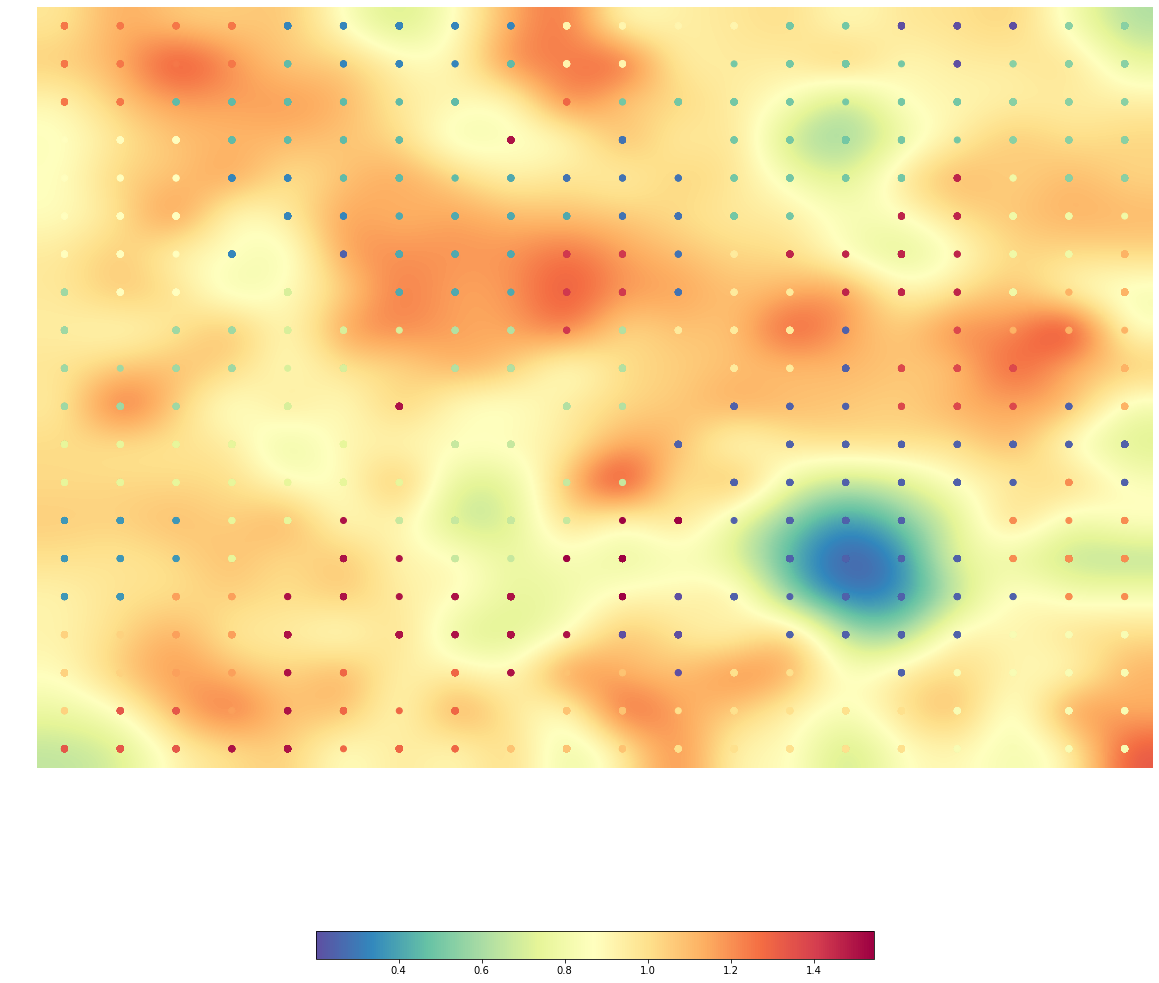


Clusters array :

[[25 25 25 25  3  3  3  3  3 17 17 17 17  7  7  0  0  0  8  8]
 [25 25 25 25  6  3  3  3  6 17 17 17  7  7  7  7  0  8  8  8]
 [25 25  6  6  6  6  6  6  6 26  7  7  7  7  7  7  7  8  8  8]
 [16 16 16  6  6  6  6  6 31  2  2  7  7  7  7  7  7  8  8  8]
 [16 16 16  3  3  6  6  6  5  2  2  2  7  7  7  7 30 14  8  8]
 [16 16 16  3  3  3  5  5  5  5  2  2  7  7  7 30 30 14 14 14]
 [16 16 16  3 12  1  5  5  5 29 29  2 18 30 30 30 30 14 14 22]
 [ 9 16 16 12 12 12  5  5  5 29 29  2 18 18 30 30 30 14 22 22]
 [ 9  9  9  9 12 12 12 10 10 29 10 18 18 18  1 28 28 22 22 22]
 [ 9  9  9  9 12 12 31 10 10 10 10 10 18 18  1 28 28 28 22 22]
 [ 9  9  9 13 12 12 31 11 10 10 10  1  1  1  1 28 28 28  1 22]
 [13 13 13 13 13 13 11 11 11 10 11  1  1  1  1  1  1  1  1  1]
 [13 13 13 13 13 13 13 11 11 11 11  1  1  1  1  1  1  1 24  1]
 [ 4  4  4 13 13 31 11 11 11 11 32 32  1  1  1  1  1 24 24 24]
 [ 4  4  4 13 31 31 31 11 11 32 32 32  1  1  1  1  1 24 24 24]
 [ 4  4 23 23 31 31 31 31 31 31 32  

In [22]:
#U-Matrix:
som.view_umatrix(bestmatches=True, figsize=(20, 20), colorbar=True)

# Print clusters array:
print("\nClusters array :\n")
print(som.clusters)

# Print sorted number of neurons per cluster:
cl_indices, counts = np.unique(som.clusters, return_counts=True)
cl_cnt = np.vstack((cl_indices, counts))
cl_cnt = cl_cnt[:, np.argsort(cl_cnt[1])]
print("\nClusters sorted by increasing number of neurons:")
print("First row : Cluster index\nSecond row : Number of neurons")
print(cl_cnt)


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

Ο κώδικας των 3 παραπάνω συναρτήσεων ακολουθεί παρακάτω. Έχει προστεθεί δυνατότητα να μας επιστρέφει αν θέλουμε τις n πιο συχνές κατηγορίες για ένα cluster.

In [23]:
from operator import itemgetter
def print_categories_stats(IDs):
    total_cats = []
    # get all categories of the movies with ids = IDs
    for id in IDs:
        cat_id = [t.strip(" \"") for t in categories[id][0].split(",")]
        total_cats.extend(cat_id)
    # find frequency of each unique category in the list
    cats, counts = np.unique(total_cats, return_counts=True)
    freq_per_type = list(zip(cats.tolist(), counts.tolist()))
    freq_per_type.sort(reverse=True, key=itemgetter(1))
    return freq_per_type
        
# Functions receives list of neurons of a cluster and returns
# a list of the movies who belong to those neurons
def neuron_movies_report(neurons):
    IDs = []
    neurons_str = np.array([np.array2string(el) for el in neurons])
    for neuron in neurons_str:
        indice_neuron = np.where(ubmus_str == neuron)
        ind = indice_neuron[0].tolist()
        for i in ind:
            mov_ids_neuron = np.where(indices == i)[0]
            IDs.extend(mov_ids_neuron.tolist())
    return IDs

# n_mov : print for the cluster the first n_cat categories
def print_cluster_neurons_movies_report(cluster_id, n_cat = 0):
    # find neurons(bmus coordinates) for the given cluster
    cl_rows, cl_columns = np.where(som.clusters == cluster_id)
    neurons = np.column_stack((cl_columns, cl_rows))
    # find movie ids for the pecific neurons
    movies_ids = neuron_movies_report(neurons)
    print("NUmber of movies : ", len(movies_ids))
    # Calculate frequency of categories for the movies_ids
    stats = print_categories_stats(movies_ids)
    if n_cat:
        print(stats[:n_cat])
    else:
        # no specific number is passed
        print(stats)
    # return stats


Στην συνέχεια τυπώνουμε για κάθε cluster του τελικού SOM την συχνότητα των κατηγοριών σε αυτό:

In [24]:
for cl in range(0,33):
    print("\n Cluster %d : \n" % (cl))
    print_cluster_neurons_movies_report(cl)


 Cluster 0 : 

NUmber of movies :  105
[('Musical', 105), ('Comedy', 56), ('Romance Film', 30), ('Musical comedy', 16), ('Romantic comedy', 13), ('Black-and-white', 12), ('Comedy film', 6), ('Family Film', 6), ('Screwball comedy', 4), ('Drama', 3), ('Ensemble Film', 3), ('Backstage Musical', 2), ('Bollywood', 2), ('Crime Fiction', 2), ('Indie', 2), ('Road movie', 2), ('Romantic drama', 2), ('Teen', 2), ('Adventure Comedy', 1), ('Americana', 1), ('Animation', 1), ('Anime', 1), ('Beach Film', 1), ('Biopic [feature]', 1), ('Buddy film', 1), ('Christian film', 1), ('Costume drama', 1), ('Crime Comedy', 1), ('Cult', 1), ('Dance', 1), ('Docudrama', 1), ('Fantasy', 1), ('Fantasy Comedy', 1), ('Feminist Film', 1), ('Filmed Play', 1), ('Historical drama', 1), ('Historical fiction', 1), ('Horror', 1), ('Jukebox musical', 1), ('Musical Drama', 1), ('Mystery', 1), ('Parody', 1), ('Pre-Code', 1), ('Science Fiction', 1), ('Short Film', 1), ('Slapstick', 1), ('Slice of life story', 1), ('Swashbuckle


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


**Ακολουθεί η ανάλυση των 3 παραπάνω τοπολογικών ιδιοτήτων του SOM:**

**1.**
Η πιο συχνή κατηγορία που αντιλαμβανόμαστε από τον χάρτη και τα clusters είναι το Drama. Το clusters 1 που είναι το cluster με τους περισσότερους νευρώνες (με διαφορά από το 2ο) έχει σχεδόν αποκλειστικά ταινίες Drama. Λαμβάνοντας υπόψιν ότι υπάρχουν πολλές ταινίες Drama και στα clusters 18, 28, 30 μπορούμε με ασφάλεια να πούμε ότι αποτελεί την πιο πολυπληθή κατηγορία στο set μας. Επίσης, σε μικρότερο βαθμό παρατηρείται αυτή η κατηγορία και σε άλλα clusters γύρω απο αυτά τα 4 (1, 18, 28, 30).
Αυτή η υψηλή πυκνότητα πιθανότητας που παρουσιάζει η κατηγορία Drama ανταποκρίνεται και στο πλήθος των νευρώνων που χαρακτηρίζει, οι οποίες μόνο για τα clusters 1, 18, 28, 30 είναι :
47 + 8 + 8 + 10 = 73 ( από τους 20 * 20 = 400 νευρώνες)
Επομένως, η κατηγορία Drama χαρακτηρίζει περίπου 15-20% των νευρώνων του χάρτη, αντίστοιχο με την πυκνότητά της αν λάβουμε υπόψιν τα 4 αυτά clusters.  
Παρόμοια πορίσματα βγάζουμε και για λιγότερες συχνές κατηγορίες όπως το Documentary. Η κατηγορία αυτή χαρακτηρίζει μόνο ένα cluster (21. Βέβαια, υπάρχει και σε άλλη αλλά το πλήθος έιναι αμελητέο σε σχέση με το cluster 21. Το πλήθος του στο set είναι περίπου 120~ ,δηλαδή ~2-3%. Οι νευρώνες στο cluster 21 είναι 6. Οπότε, η κατηγορία Documentary χαρακτηρίζει περίπου το ~1.5% των νευρώνων του χάρτη, το οποίο ανταποκρίνεται στο ποσοστό της κατηγορίας στο dataset.

**2.**
Στον χάρτη οι κατηγορίες Science Fiction, Horror, Thriller βρίσκονται κάτω αριστερά στον χάρτη (clusters 4, 20, 23, 27) ενώ οι κατηγορίες Comedy (clusters 7, 8) , Musical ( cluster 0) βρίσκονται πάνω αριστερά. Το οποίο τοπολογικά είναι αναμενόμενο διότι πρόκειται για μακρινά πρότυπα εισόδου, αφού δεν συνδυάζονται εύκολα και συχνά αυτές οι κατηγορίες (πχ Horror και Musical) στην ίδια ταινία.

**3.**
Μία περίπτωση συναφών κατηγοριών είναι το Drama, Comedy, Musical. Αυτές πέρα απο το dataset μας, υπάρχουν πολύ συχνά σε παρόμοιες κατηγορίες ειδικά το Comedy με το Musical και το Comedy με το Drama.
Συγκεκριμένα: το cluster 30 κυρίως και δευτερευόντως το 14 χαρακτηρίζεται απο τις κατηγορίες Comedy, Drama
το cluster 0 εμφανίζει υψηλή συχνότητα στις κατηγορίες Comedy και Musical.
Ομοίως και το Drama με το Romance που φαίνεται στο cluster 24 και 15.
Γενικότερα, όλες οι κατηγορίες που αναφέρθηκαν βρίσκονται στην ίδια πλευρά του χάρτη (συγκεκριμένα δεξιά) και σε γειτονικά cluster ή ακόμα και σε ίδια.  
Παρόμοια εικόνα έχουμε και για τα είδη Thriller, Action, Adventure. Όλα αυτά παρατηρούνται στην αριστερά πλευρά του χάρτη σε γειτονικά clusters. Συγεκριμένα στα 3, 4, 6, 9, 13, 16 κυριαρχούν αυτά τα είδη. Επίσης σε αυτά τα clusters, παρατηρούμε και υψηλή συχνότητα σχετικών υπο-ειδών όπως το Crime Fiction στο 9, και το War Film στα 3 και 6.


**Στην συνέχεια ακολουθεί αναφορά στην συνάφεια και σε πιθανά συμπεράσματα για κάθε Cluster:**

**Cluster 0:**  
Όλες οι ταινίες ανήκουν στην κατηγορία Musical. ΕΠίσης και οι επόμενες 4 πιο συχνές κατηγορίες (Comedy, Romance Film, Romantic Comendy, Musical Comedy) έχουν σαφή συνάφεια με τα Musical.

**Cluster 1:**  
Όλες οι ταινίες (παρά μία) ανήκουν στην κατηγορία Drama, ενώ και οι επόμενες κατηγορίες είναι συναφείς (με πολύ μικρότερη συχνότητα όμως), πέρα απο την 2η, Black and White, η οποία αν και φαίνεται άσχετη δεν είναι διότι πολλές παλιές και σύγχρονες ασπρόμαυρες ταινίες περιέχουν κάποια δραματική ιστορία. Μπορούμε ασφαλώς να συμπεράνουμε ,από το γεγονός ότι η κατηγορία Drama ξεχωρίζει σημαντικά, ότι οι συντριπτική πλειοψηφία των ταινιών  ,που ανήκουν σε λίγες κατηγορίες (max 2-3) και μία απο αυτές είναι το Drama, βρίσκονται σε αυτό το Cluster.

**Cluster 2:**  
Η κατηγορία αυτή κυρίως αντιστοιχεί σε ταινίες με κάποια περιπέτεια (όλες οι ταινίες του cluster έχουν αυτην την κατηγορία), οι οποίες όμως είναι και κατάλληλες για όλη την οικογένεια και παιδιά (2/3 των ταινιών είναι οικογενειακές) και δεν παρατηρούνται κατηγορίες ακατάλληλες για αυτόν τον πληθυσμό.

**Cluster 3:**  
Είναι όλες ταινίες Δράσης με αρκετές από αυτές να παρουσιάζουν κάποια δραματική ιστορία, πιθανόν σχετική με κάποια εγκλήματα. Παρομοίως και εδώ δεν παρουσιάζονται έντονα κατηγορίες που δεν συνάδουν με τις κυρίαρχες του cluster.

**Cluster 4:**  
Πρόκειται για κατηγορία με ταινίες Thriller (όλες ανήκουν σε αυτήν την κατηγορία) που είναι σχεδόν όλες και Horror και αρκετές από αυτές περιέχουν κάποιο Μυστήριο.

**Cluster 5:**  
Όλες οι ταινίες είναι ταινίες Fantasy. Οι υπόλοιπες κυρίαρχες κατηγορίες συνάδουν με την πρώτη κατηγορία : Adventure, Οικογενειακές και Κινούμενα Σχέδια.

**Cluster 6:**  
Η συντριπτική πλειοψηφία των ταινιών είναι Adventure, Action, Drama. Πρόκειται για είδη που παρουσιάζονται πολύ συχνά μαζί σε μία ταινία. Υψηλά βρίσκονται και οι Πολεμικές ταινίες οι οποίες και αυτές πάντα έχουν να κάνουν με τουλάχιστον 2 από τις 3 προαναφερόμενες κατηγορίες.

**Cluster 7:**  
Όλες οι ταινίες του cluster είναι Comedy. Οπότε, δεν μας ενδιαφέρουν οι υπόλοιπες κατηγορίες (οι οποίες μάλιστα δεν είναι τόσο συχνές) διότι αποτελούν υπο-είδη, δευτερεύουσες κατηγορίες ταινιών που θεωρούνται κομωδίες.

**Cluster 8:**  
Ομοίως και εδώ έχουμε κυρίαρχη την κατηγορία Comedy. Η διαφορά αυτού του cluster σε σχέση με το 7 είναι ότι οι δευτερεύουσες κατηγορίες είναι παρόμοια συχνές με την κυρίαρχη. Μπορούμε με ασφάλεια να συμπεράνουμε ότι στο cluster 8 βρίσκονται κομωδίες που είναι και Drama ή έχουν κάποια ρομαντική ιστορία (το πλήθος της κατηγορίας Romance Film είναι πολύ κοντά στο Comedy) και βρέθηκαν σε ξεχωριστό Cluster σε σχέση με το 7 διότι το πλήθος των ταινιών που είναι ρομαντικές κομωδίες είναι αρκετά υψηλό, σε σχέση με άλλους συνδυασμούς Κομωδίας και άλλου είδους.

**Cluster 9:**  
Σχεδόν όλες οι ταινίες είναι Thriller και δευτερευόντως Crime Fiction, Drama, Crime Thriller, Mystery. Συμπεραίνουμε ότι στο cluster αυτό ανήκουν Thriller με θεματική γύρω από το έγκλημα, οπότε είναι αναμενόμενες οι υπόλοιπες συχνές κατηγορίες, όπως Mystery , Film Noir, Crime Thriller.

**Cluster 10:**  
Όλες σχεδόν οι ταινίες είναι κυρίως animation, οικογενειακές και μικρού μήκους. Επίσης δευτερευόντως είναι κομωδίες. Οι κατηγορίες αυτές είναι αναμενόμενο να συνυπάρχουν σε ταινίες, διότι πχ αρκετά animation είναι για παιδιά, μικρού μήκους με κάποια κωμική ιστορία. Οπότε, μπορούμε να πούμε ότι αυτό το cluster ανταποκρίνεται σε τέτοια κινούμενα σχέδια, όπως για παράδειγμα αυτά που υπάρχουν κυρίως στην τηλεόραση.

**Cluster 11:**  
Όλες οι ταινίες είναι μικρού μήκους και αρκετές από αυτές animation, όμως οι πιθανές δεύτερες κατηγορίες των ταινιών έχουν σχετικά μικρή συχνότητα σε σχέση με την κυρίαρχη (πέρα απο το Animation). Υποθέτουμε ότι σε αυτήν την κατηγορία ανήκουν ταινίες μικρού μήκους που δεν είναι για οικογένειες.

**Cluster 12:**  
Όι ταινίες είναι όλες Crime Fiction, παρόμοιες με αυτές στο cluster 9, αλλά σε αυτό το cluster έχουν μικρότερη βαρύτητα οι κατηγορίες Thriller και Drama και Mystery.

**Cluster 13:**  
Όλες οι ταινίες είναι Thriller και η συγκεκριμένη κατηγορία ξεχωρίζει σε σχέση με γειτονικά cluster όπως το 9, στο οποίο παρόμοια συχνότητα με την κυρίαρχη παρουσίαζαν και άλλες κατηγορίες.

**Cluster 14:**  
Σε αυτό το cluster κυριαρχούν σε παρόμοιο βάθμο οι κατηγορίες Indie, Drama και Comedy, με πρώτη το Indie. Υπάρχει ισχυρή συνάφεια μεταξύ των 3 αυτών κατηγοριών, διότι οι ανεξάρτητες παραγωγές (Indie) είναι συνήθως κάποιο κοινωνικό η κωμικό δράμα και όχι περιπέτειες δράσης οι οποίες συνήθως είναι ακριβές παραγωγές από mainstream συνεργεία κινηματογράφου.

**Cluster 15:**  
Πρόκειται για ταινίες Drama με ρομαντικές ιστορίες, οι οποίες είναι αρκετά συχνές σε δράματα. Το cluster αυτό συνορεύει με το cluster 1 στο οποίο υπάρχουν επίσης ταινίες Drama. Ένας πιθανός λόγος που ξεχώρισε είναι διότι τα ρομαντικά δράματα αποτελούν πιθανόν το πιο γνωστό υπο-είδος των δραμάτων και στο set μας έχουμε αρκετές τέτοιες ταινίες.

**Cluster 16:**  
Κυριαρχεί η κατηγορία Action και οι δευτερεύοντες κατηγορίες παρουσιάζουν εξίσου υψηλή συχνότητα. Ο συνδυασμός Action- Thriller-Adeventure υπάρχει αρκετά έντονα στον κινηματογράφο, οπότε είναι αρκετά κατανοητό το γεγονός ότι υπάρχει cluster κυρίως με ταινίες που χαρακτηρίζονται και από τις 3 κατηγορίες.

**Cluster 17:**   
Σχεδόν όλες οι ταινίες είναι στην κατηγορία Short Film, και η πλειοψηφία αυτών είναι Comedy και Black and White. Σε μικρότερο βαθμό βλέπουμε τις κατηγορίες Silent Film και Indie, οι οποίες συνάδουν απόλυτα με την κατηγορία Short Film.

**Cluster 18:**  
Όλες οι ταινίες είναι στην κατηγορία Family Film και η πλειοψηφία αυτών είναι στην κατηγορία Drama, ενώ ορισμένες από αυτές ανήκουν στην κατηγορία Family Drama. Αυτές οι κατηγορίες συνάδουν απόλυτα μεταξύ τους διότι διαπιστώνουμε ότι αυτό το Cluster περιέχει σχεδόν αποκλειστικά ταινίες που η θεματική τους είναι το οικογενειακό δράμα.

**Cluster 19:**  
Σχεδόν όλες οι ταινίες είναι στην κατηγορία World Cinema, με την πλειοψηφία αυτών να είναι στην κατηγορία Drama, ενώ έχουμε επίσης και κατηγορίες Bollywood, Musical και Thriller. Γενικά σε αυτό το Cluster έχουμε μία ευρεία γκάμα ταινιών η οποία περιλαμβάνει ταινίες από παραγωγές διαφορετικών χωρών, με μία έμφαση στις ινδικές.(Bollywood) Επίσης η πλειοωψηφία αυτών των ταινιών αφορά Drama ή Thriller.

**Cluster 20:**  
Όλες οι ταινίες ανήκουν στην κατηγορία Horror, και σχεδόν όλες στην κατηγορία Slasher. Επίσης ξεχωρίζουν λιγότερο οι κατηγορίες B-movie, Teen, Culte, thriller. Επομένως έχουμε να κάνουμε με πιο low-budget ταινίες οι οποίες έιναι τρόμου, και ορισμένες από αυτές έχουν ενδεχομένως πρωταγωνιστή μικρής ηλικίας.

**Cluster 21:**  
Όλες οι ταινίες είναι στην κατηγορία Documentary και η δεύτερη επικρατούσα είναι η Biography. Έχουμε να κάνουμε με ντοκυμαντέρ και βιογραφίες πολιτικών, ιστορικών και επιστημονικών προσώπων κατα βάση.

**Cluster 22:** 
Οι περισσότερες ταινίες είναι στην κατηγορία Drama και στην κατηγορία Indie. Επίσης ξεχωρίζουν οι κατηγορίες Silent Film και Black and White, οι οποίες είναι απόλυτα σχετικές, καθώς πολλές ασπρόμαυρες ταινίες είναι "βουβές" και είναι low-budget, ενώ το όλο γενικότερο ύφος ενθαρύννει το ύφος των ταινιών ωστε να είναι δραματικό.

**Cluster 23:**  
Σχεδόν όλες οι ταινίες είναι επιστημονικής φαντασίας και ανήκουν επιπλέον στην κατηγορία Horror. Πιο κάτω εντοπίζουμε κατηγορίες όπως Creature Film, Horror, Sci-Fi Horror. Όλες αυτές οι ετικέτες είναι σχετικές καθότι όπως καταλαβαίνουμε έχουμε να κάνουμε με ταινίες στις οποίες κυριαρχεί το υπερφυσικό στοιχείο (εξωγήινοι).

**Cluster 24:**  
Και εδώ όλες οι ταινίες ανήκουν στις κατηγορίες Drama και Romance Film, οπότε έχουμε να κάνουμε με ταινίες στις οποίες η πλοκή αφορά ρομαντικό δράμα.

**Cluster 25:**  
Σχεδόν όλες οι ταινίες είναι Action/Adventure και Action. Πιο κάτω εντοπίζουμε τις κατηγορίες World Cinema, Martial Arts και Comedy. Οι κατηγορίες αυτές σχετίζονται μεταξύ τους καθώς οι ταινίες δράσης σε αρκετές περιπτώσεις περιέχουν χιουμοριστικό ύφος, και πολλές ταινίες δράσης κινούνται γύρω απο το πεδίο των πολεμικών τεχνών. Επιπλέον, διάφορες χώρες ανα τον κόσμο έχουν παράγει πολλές ταινίες δράσης.

**Cluster 26:**  
Πρόκειται για ένα απο τα πιο ανομοιογενή clusters που έχουμε. Δεν κυριαρχεί μόνο μία κατηγορία αλλά οι κατηγορίες Silent Film, Western, Black and White. Όμως, αν και δεν γνωρίζουμε σε τι βαθμό υπάρχουν ταινίες που ανήκουν και στις 3 κατηγορίες, υπάρχει κάποια συνάφεια μεταξύ τους. Αρκετές παλιές γνωστές ταινίες ήταν ασπρόμαυρες, βουβές και το είδος Western έγινε αρκετά διάσημο σε εποχές που ακόμα υπήρχαν βουβές ασπρόμαυρες ταινίες. Επιπλεόν, ένας λόγος που εμφανίζονται και οι 3 στην ίδια κατηγορία μπορεί να οφείλεται στο τρόπο περιγραφής (και λεξιλόγιο) των ταινιών στα μέσα του 20ου αιώνα και παλιότερα.

**Cluster 27:**  
Όλες οι ταινίες είναι στην κατηγορία Horror με ξεκάθαρη επικράτηση στον αριθμό. Tα Zombie και τα τέρατα είναι ένα σύνηθες στοιχείο που διέπει αυτές τις ταινίες εξ'ου και συναντάμε σε ορισμένες από αυτές τις κατηγορίες Zombie Film και Creature Film.

**Cluster 28:**  
Σχεδόν όλες οι ταινίες είναι Drama, όμως οι περισσότερες από αυτές είναι και στις κατηγορίες Biography, Biographical Film και Biopic. Βλέπουμε λοιπόν πς έχουμε ταινίες δραματικού χαρακτήρα, γύρω απο τη ζωή κάποιου προσώπου.

**Cluster 29:**  
Σχεδόν όλες οι ταινίες είναι κινούμενα σχέδια και στις κατηγορίες Children's/Family, Family Film, Adventure και Children's Fantasy. Σε αυτό το Cluster λοιπόν έχουμε τις ταινίες κινουμένων σχεδίων.

**Cluster 30:**  
Όλες οι ταινίες ανήκουν στην κατηγορία Comedy και σχεδόν όλες στην κατηγορια Drama. Πράγμα το οποίο παρατηρούμε και από τον χάρτη του Cluster, καθώς το 30 βρίσκεται ανάμεσα στο 7 και στο 1(άρα είναι αναμενόμενο).

**Cluster 31:**  
Στο cluster αυτό οι ταινίες δεν εμφανίζουν κάποια συνάφεια. Οι κατηγορίες είναι αρκετά διαφορετικές από άποψη σημασιολογίας, ενώ και η κυριάρχη κατηγορία (Japanese Movies) υπάρχει μόνο στο ~1/6 των ταινιών του cluster. Αυτό μπορεί να δικαιολογηθεί σε ένα βαθμό, διότι το cluster στον χάρτη δεν είναι συνεκτικό. Με άλλα λόγια κάποιοι νευρώνες που το απαρτίζουν βρίσκονται ξεχωριστά από το σημείο του χάρτη που εμφανίζεται το συγκεκριμένο cluster. Επίσης, τα clusters γύρω του έχουν αρκετά διαφορετικές κατηγορίες: στα αριστερά στο χάρτη υπάρχουν κυρίως Horror και Thriller, στα δεξιά Comedy και Musical και πάνω Animation και Short Film.

**Cluster 32:**  
Όλες οι ταινίες ανήκουν στην κατηγορία Comedy και λίγες από αυτές στην κατηγορία Drama. Ισχύουν όλα όσα είπαμε και για το Cluster 30.


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο mycourses το παρόν notebook επεξεργασμένο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Προσέξτε ώστε να **απαντήσετε σε όλα τα σημεία όπου απαιτείται**.
- Μαζί Θα παραδώσετε τα joblib dumps των τελικών `corpus_tf_idf.pkl` και `som.pkl` (μεγάλος χάρτης - 5000 ταινίες) που θα χρησιμοποιήσετε. Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στο dump του χάρτη που θα μας παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. Οδηγίες για την αποθήκευση των dumps θα βρείτε στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing). 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **4 αρχεία (το .ipynb και το .py του notebook καθώς και τα δύο .pkl)**
- **Το maximum upload filesize στο mycourses είναι 29MB**, εάν το zip σας είναι μεγαλύτερο, δεν έχετε βελτιστοποιήσει το tfidf.

<table>
  <tr>
    <td bgcolor="#FCF8E3"><font size="4">ΞΑΝΑ: Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!!</font>
</td>
  </tr>
</table>


## Ημερομηνία παράδοσης ##

Πέμπτη 17 Ιανουαρίου 2019 αυστηρά (παρακαλούμε όχι αιτήματα για παράταση).

Καλή επιτυχία!
